In [1]:
import pandas as pd

In [19]:
df = pd.read_excel(r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Опросник международной конференции\rawDataReport.xlsx", sheet_name="Сырые данные")

In [20]:
df.head(5)

,Название,Тип,ID пользователя,Фамилия,Имя,Email,Группа участника,Вопрос,Ответ,Время ответа,Результат
0,Сауалнама,Опрос,931289,Kenzhebekova,Aidana,aydana.kenzhebekova.00@mail.ru,NaN,1. 1. Білім беру саласында қанша жыл жұмыс жас...,1 жылдан аз,2023-11-02 14:26:30.368,NaN
1,Сауалнама,Опрос,931289,Kenzhebekova,Aidana,aydana.kenzhebekova.00@mail.ru,NaN,2. 2. Ауыл мектебінде қанша жыл жұмыс жасап ке...,1 жылдан аз,2023-11-02 14:26:30.368,NaN
2,Сауалнама,Опрос,931289,Kenzhebekova,Aidana,aydana.kenzhebekova.00@mail.ru,NaN,3. 3.\tҚай өңірденсіз?,Абай облысы,2023-11-02 14:26:30.368,NaN
3,Сауалнама,Опрос,931289,Kenzhebekova,Aidana,aydana.kenzhebekova.00@mail.ru,NaN,4. 4.\tАуыл мектебі үшін конференцияда талқыла...,Ауыл мектебінің тұрақты даму моделі,2023-11-02 14:26:30.368,NaN
4,Сауалнама,Опрос,931289,Kenzhebekova,Aidana,aydana.kenzhebekova.00@mail.ru,NaN,5. 5.\tКонференцияда алынған ақпаратты өз жұмы...,5,2023-11-02 14:26:30.368,NaN


## Data processing

---

In [22]:
df[['id', 'question']] = df['Вопрос'].str.split(' ', n=1, expand=True)

In [23]:
df['id'] = df['id'].str[:-1]

In [24]:
df['question'] = df['question'].str.replace('\t', ' ').str.split(' ', n=1).str[-1]

In [25]:
df.rename(columns={'Ответ' : 'answer'}, inplace=True)

In [26]:
df['id'] = pd.to_numeric(df['id'], errors='coerce')

In [27]:
df = df.loc[df['id'].isin([24]), ['id', 'answer']]

In [28]:
df['answer'] = df['answer'].str.strip()

In [29]:
df.head(5)

,id,answer
26,24,Конференция барысында мол пайдалы ақпараттарды...
55,24,"Ауыл мект базасында аймақтық конф өткізу,"
80,24,"Спасибо за такую конференцию, получила очень ц..."
109,24,Конференция жақсы өтті. Конференцияны жиі-жиі ...
140,24,Нет


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 26 to 13785
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      500 non-null    int64 
 1   answer  500 non-null    object
dtypes: int64(1), object(1)
memory usage: 27.9+ KB


In [30]:
kaz_rus = {
    'kaz' : [],
    'rus' : []
}

In [31]:
for index, row in df.iterrows():
    if ('ә' in df.loc[index, 'answer']) or ('і' in df.loc[index, 'answer']) or ('ң' in df.loc[index, 'answer']) or ('ғ' in df.loc[index, 'answer'])\
        or ('ү' in df.loc[index, 'answer']) or ('ұ' in df.loc[index, 'answer']) or ('қ' in df.loc[index, 'answer']) or ('ө' in df.loc[index, 'answer']) or ('һ' in df.loc[index, 'answer']):
        kaz_rus['kaz'].append(df.loc[index, 'answer'])
    else:
        kaz_rus['rus'].append(df.loc[index, 'answer'])

In [32]:
result = {
    'kaz' : [],
    'rus' : []
}

for key, value in kaz_rus.items():
    # result = {key : []}
    lists = {key : []}
    for sentence in value:
        lists[key].append(sentence.split())
    for list in lists[key]:
        for word in list:
            result[key].append(word)

In [33]:
remove_symbols = {'.', '!', '?', '&', ',', '*', '@', '$', '%', '^', '(', ')', '-', '_', '+', '='}
remove_prepositions = {'а', 'и', 'не', 'но', 'с', 'чтобы', 'в', 'в ', ' в', 'на', 'до', 'под', 'перед', 'о', 'по', 'для', 'из-за', 'от', 'у', 'без', 'при', 'до', 'за', 'из', 'к', 'над', 'об', 'от', 'пред', 'про', 'через',\
                       'Ж', 'Н', 'ме', 'ба', 'жа', 'т', 'б', 'бо', 'кон', 'Ө', 'ө', 'Т', 'кө', 'бі', 'қа', 'М', 'ж', 'Б', 'д', 'Д', 'са', 'бол', 'тә', 'ке', 'қ', 'М', 'м', 'де', 'да', 'п', 'ма', 'Ко', 'ар', 'же',\
                        'сап', 'бе', 'ш', 'ә', 'О', 'о', 'мек', 'ұ', 'і', 'құ', 'е', 'Ме', 'А', 'Ба', 'п', 'мект', 'жұ', 'та', 'ү', 'С', 'оқу', 'жұм', 'кофе', 'мекте', 'қо', 'К', 'оқ', 'пр', 'р', 'В', 'уч', 'з', 'ко', 'ра', 'И', 'Н', 'и', 'н', 'ко', 'во',\
                        'се', 'З', 'те', 'пе', 'со', 'кро','По', 'сот', 'бы', 'ор', 'сп', 'ак', 'уче', 'ц', 'раб', 'ин', 'И', 'раз', 'Р', 'П', 'В', 'Пр', 'рабо', 'пре', 'ка', 'ур', 'и ', ' и', 'в ', ' в', 'уро', 'Про', 'Вс', 'мо', 'Все', 'было', 'нет', 'нет ', ' нет'}
for lang, word_list in result.items():
    for index, word in enumerate(word_list):
        # Remove words present in remove_prepositions set
        if word in remove_prepositions:
            word_list[index] = ''
        else:
            # Remove symbols present in the word
            for symbol in remove_symbols:
                word_list[index] = word.replace(symbol, '')

## Making the wordcloud

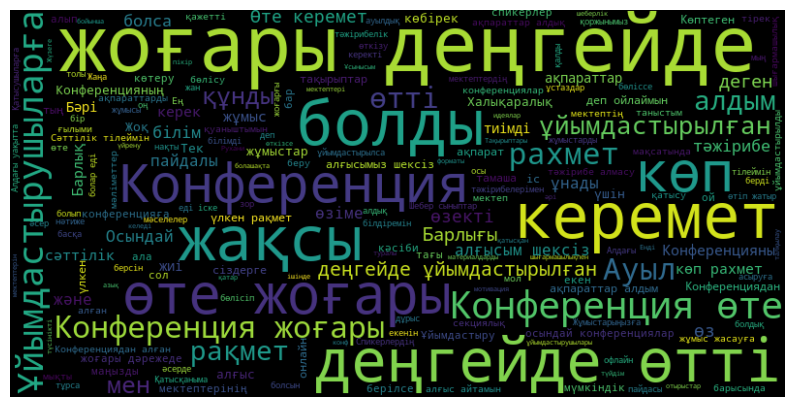

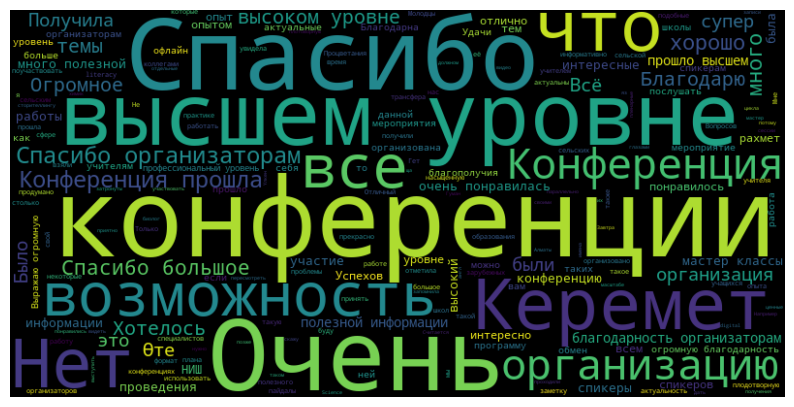

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for language in result:

    text = ' '.join(result[language])    
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') 
    plt.show()